<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-3----brightness-temperatures" data-toc-modified-id="Assignment-3----brightness-temperatures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 3 -- brightness temperatures</a></span></li><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 1</a></span></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 2</a></span></li></ul></div>

# Assignment 3 -- brightness temperatures

Upload this notebook to canvas by 10am Monday Sept. 24

# Problem 1

In the cell below define a function that inverts the radiance (in MKS units) for the
brightness temperature in Kelvins.  Use the same format as the planck_function notebook,
and use the %%file magic to output your function to a file called planck_invert.py

i.e. the top of the cell should look like:

```python
%%file planck_invert.py
def radiance_invert(wavelengths, Lstar):
   etc.
```

In [3]:
%magic --brief

In [13]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
%%file radiance.py
import numpy as np
#
# get Stull's c_1 and c_2 from fundamental constants
#
# c=2.99792458e+08  #m/s -- speed of light in vacuum
# h=6.62606876e-34  #J s  -- Planck's constant
# k=1.3806503e-23  # J/K  -- Boltzman's constant

c, h, k = 299792458.0, 6.62607004e-34, 1.38064852e-23
c1 = 2. * h * c**2.
c2 = h * c / k
sigma = 2. * np.pi**5. * k**4. / (15 * h**3. * c**2.)

def calc_radiance(wavel, Temp):
    """
    Calculate the blackbody radiance
    
    Parameters
    ----------

      wavel: float or array
           wavelength (meters)

      Temp: float
           temperature (K)

    Returns
    -------

    Llambda:  float or arr
           monochromatic radiance (W/m^2/m/sr)
    """
    Llambda_val = c1 / (wavel**5. * (np.exp(c2 / (wavel * Temp)) - 1))
    return Llambda_val

def planck_invert(wavel, Lstar):
    """
    Calculate the brightness temperature
    
    Parameters
    ----------

      wavel: float
           wavelength (meters)

      Lstar: float or array
           Blackbody radiance (W/m^2/m/sr)
    Returns
    -------

    Tbright:  float or arr
           brightness temperature (K)
    """
    Tbright = c2 / (wavel * np.log(c1 / (wavel**5. * Lstar) + 1.))
    return Tbright



Writing radiance.py


In [28]:
import a301.radiation
from a301.radiation import planck_invert
print(planck_invert(908.80,99.53))

inf


/Users/TaylorLee/a301_code/a301/radiation.py:78: RuntimeWarning: divide by zero encountered in double_scalars
  Tbright = c2 / (wavel * np.log(c1 / (wavel**5. * Lstar) + 1.))


In [4]:
import planck_invert
from planck_invert import radiance_invert
print(radiance_invert(908.80, 99.53))

290.91980012741027


# Problem 2

In the next cell import your radiance_invert function and use it to turn the calibrated
radiances you've written out in your modis_data_analysis notebook into brightness temperatures
in Kelvins.  Plot the temperatures as an image, using a colorbar as in Modis level1b notebook

In [3]:
import planck_invert
from planck_invert import radiance_invert

In [4]:
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt
from a301.utils.data_read import download

In [5]:
get_data=False
if get_data:
    modis_file="ch30_out.hdf"
    download(modis_file)

In [6]:
home = Path.home()
print(home)
data_dir = home / Path("Downloads")
print(data_dir)

/Users/TaylorLee
/Users/TaylorLee/Downloads


In [7]:
hdf_files=list(data_dir.glob("ch30_out.hdf"))
hdf_files
print(data_dir)

/Users/TaylorLee/Downloads


In [8]:
file_name = str(data_dir / Path(hdf_files[0]))
print(f'reading {file_name}')
the_file = SD(file_name, SDC.READ)
stars='*'*50
print((f'\n{stars}\nnumber of datasets, number of attributes'
       f'={the_file.info()}\n{stars}\n'
       f'\nHere is the help file for the info funtion:\n'))
help(SD.info)

reading /Users/TaylorLee/Downloads/ch30_out.hdf

**************************************************
number of datasets, number of attributes=(31, 58)
**************************************************

Here is the help file for the info funtion:

Help on function info in module pyhdf.SD:

info(self)
    Retrieve information about the SD interface.
    
    Args::
    
      no argument
    
    Returns::
    
      2-element tuple holding:
        number of datasets inside the file
        number of file attributes
    
    C library equivalent : SDfileinfo



In [9]:
datasets_dict = the_file.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


In [10]:
longwave_data = the_file.select('EV_1KM_Emissive') # select sds
print(longwave_data.info())
help(longwave_data.info)

('EV_1KM_Emissive', 3, [16, 2030, 1354], 23, 8)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo



In [11]:
data_row = longwave_data[0,0,:] 
print(data_row.shape,data_row.dtype)

(1354,) uint16


In [12]:
longwave_data[0,:,:]

array([[8354, 7804, 6953, ..., 4276, 4028, 3833],
       [8336, 8216, 6464, ..., 4283, 4178, 3924],
       [7252, 6983, 7178, ..., 4204, 4114, 3949],
       ...,
       [3786, 3794, 3764, ..., 3454, 3462, 3432],
       [3775, 3745, 3670, ..., 3434, 3464, 3434],
       [3834, 3759, 3663, ..., 3421, 3473, 3488]], dtype=uint16)

In [13]:
pprint.pprint(longwave_data.attributes() )

{'_FillValue': 65535,
 'band_names': '20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36',
 'long_name': 'Earth View 1KM Emissive Bands Scaled Integers',
 'radiance_offsets': [2467.264404296875,
                      2480.6005859375,
                      2478.176513671875,
                      2402.468505859375,
                      1077.44482421875,
                      1560.3333740234375,
                      2724.21826171875,
                      2317.48828125,
                      2610.015380859375,
                      1560.333251953125,
                      2035.9332275390625,
                      2119.08447265625,
                      2500.599365234375,
                      2499.093505859375,
                      2500.5205078125,
                      2495.89111328125],
 'radiance_scales': [6.9307534431573e-05,
                     0.00346690253354609,
                     7.626575097674504e-05,
                     8.990753121906891e-05,
                     3.1556141

In [14]:
pprint.pprint(the_file.attributes()['StructMetadata.0'][:1000])

('GROUP=SwathStructure\n'
 '\tGROUP=SWATH_1\n'
 '\t\tSwathName="MODIS_SWATH_Type_L1B"\n'
 '\t\tGROUP=Dimension\n'
 '\t\t\tOBJECT=Dimension_1\n'
 '\t\t\t\tDimensionName="Band_250M"\n'
 '\t\t\t\tSize=2\n'
 '\t\t\tEND_OBJECT=Dimension_1\n'
 '\t\t\tOBJECT=Dimension_2\n'
 '\t\t\t\tDimensionName="Band_500M"\n'
 '\t\t\t\tSize=5\n'
 '\t\t\tEND_OBJECT=Dimension_2\n'
 '\t\t\tOBJECT=Dimension_3\n'
 '\t\t\t\tDimensionName="Band_1KM_RefSB"\n'
 '\t\t\t\tSize=15\n'
 '\t\t\tEND_OBJECT=Dimension_3\n'
 '\t\t\tOBJECT=Dimension_4\n'
 '\t\t\t\tDimensionName="Band_1KM_Emissive"\n'
 '\t\t\t\tSize=16\n'
 '\t\t\tEND_OBJECT=Dimension_4\n'
 '\t\t\tOBJECT=Dimension_5\n'
 '\t\t\t\tDimensionName="10*nscans"\n'
 '\t\t\t\tSize=2030\n'
 '\t\t\tEND_OBJECT=Dimension_5\n'
 '\t\t\tOBJECT=Dimension_6\n'
 '\t\t\t\tDimensionName="Max_EV_frames"\n'
 '\t\t\t\tSize=1354\n'
 '\t\t\tEND_OBJECT=Dimension_6\n'
 '\t\t\tOBJECT=Dimension_7\n'
 '\t\t\t\tDimensionName="2*nscans"\n'
 '\t\t\t\tSize=406\n'
 '\t\t\tEND_OBJECT=Dimension_7\n'

In [15]:
longwave_bands = the_file.select('Band_1KM_Emissive')

In [16]:
longwave_bands.attributes()

{'long_name': '1KM Emissive Band Numbers for Subsetting'}

In [17]:
band_nums=longwave_bands.get()
print(f'here are the modis channels in the emissive dataset \n{band_nums}')

here are the modis channels in the emissive dataset 
[20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


In [18]:
ch30_index=np.searchsorted(band_nums,30.)
print(ch30_index.dtype)
ch30_index = int(ch30_index)
print(f'channel 30 is located at index {ch30_index}')

int64
channel 30 is located at index 9


In [19]:
ch30_data = longwave_data[ch30_index,:,:]
print(ch30_data.shape)
print(ch30_data.dtype)

(2030, 1354)
uint16


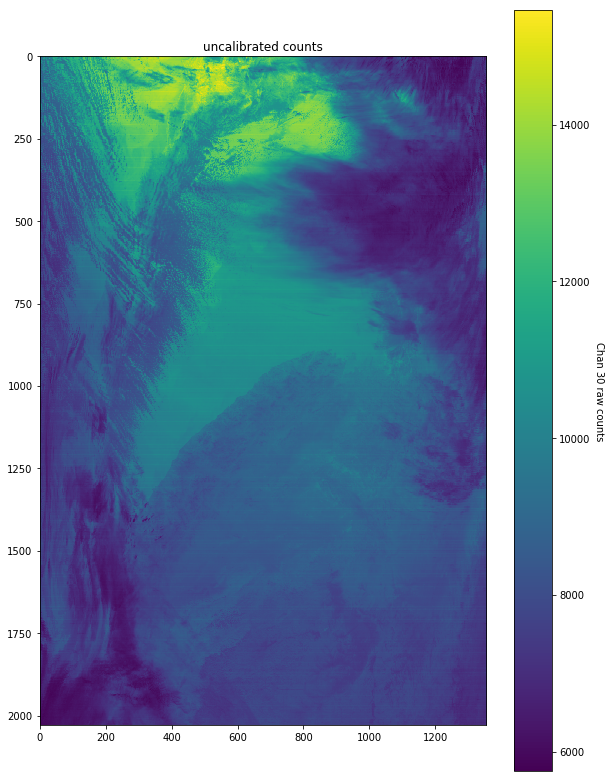

In [20]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_data)
cax=fig.colorbar(CS)
ax.set_title('uncalibrated counts')

out=cax.ax.set_ylabel('Chan 30 raw counts')
out.set_verticalalignment('bottom')
out.set_rotation(270)

In [21]:
scales=longwave_data.attributes()['radiance_scales']
offsets=longwave_data.attributes()['radiance_offsets']
ch30_scale=scales[ch30_index]
ch30_offset=offsets[ch30_index]
print(f'scale: {ch30_scale}, offset: {ch30_offset}')

scale: 0.0004063234373461455, offset: 1560.333251953125


In [22]:
ch30_calibrated =(ch30_data - ch30_offset)*ch30_scale

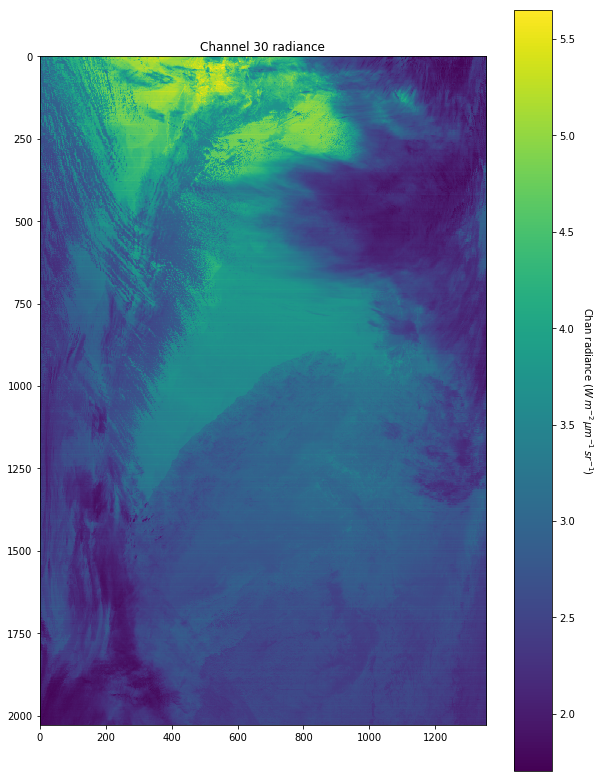

In [23]:
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch30_calibrated)
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance')

out=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)

In [24]:
outname="ch30_out.hdf"
sd = SD(outname, SDC.WRITE | SDC.CREATE)

sds = sd.create("ch30", SDC.FLOAT64, ch30_calibrated.shape)

sds.setfillvalue(0)

dim1 = sds.dim(0)
dim1.setname("row")
dim2 = sds.dim(1)
dim2.setname("col")

sds.units = "W/m^2/micron/sr"

sds[:,:] = ch30_calibrated

sds.endaccess()

sd.end()

In [25]:
local_file = Path.cwd() / Path(outname)
to_file = data_dir / Path(outname)
local_file.rename(to_file)

In [27]:
wavel= 9.73e-6  
ch30_radiances=ch30_data*1.e6; 
ch30_Tbright = planck_invert(wavel,ch30_radiances)

TypeError: 'module' object is not callable